In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pingouin as pg
%matplotlib inline

In [5]:
data = pd.read_csv('../Data_Files/fugazi.dat', sep='\t')
data.head()

,music,age,liking
0,1,1,-84
1,1,1,-71
2,1,1,-74
3,1,1,-75
4,1,1,-98


In [6]:
data.groupby(['age','music']).describe()['liking']

count       mean        std    min   25%   50%   75%    max
age music                                                             
1   1       15.0 -75.866667  14.371930  -98.0 -83.5 -75.0 -73.5  -45.0
    2       15.0  59.933333  19.983803   24.0  48.0  60.0  74.5   90.0
    3       15.0  74.266667  22.294992   27.0  63.5  76.0  87.0  122.0
2   1       15.0  66.200000  19.904056   38.0  53.0  68.0  78.5   96.0
    2       15.0  64.133333  16.995237   37.0  54.0  65.0  73.0   92.0
    3       15.0 -71.466667  23.179013 -118.0 -86.0 -66.0 -54.0  -40.0

#### for music : 1->fugazi, 2->ABBA, 3-> Barf Grooks
#### for age : 1-> 40+, 2->0-40

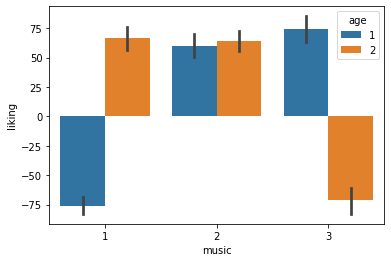

In [7]:
_ = sns.barplot(x='music', y='liking', hue='age', data=data)

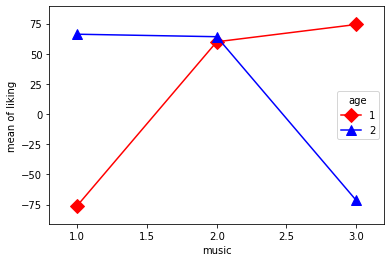

In [8]:
from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(data.music, data.age, data.liking,
             colors=['red','blue'], markers=['D','^'], ms=10)

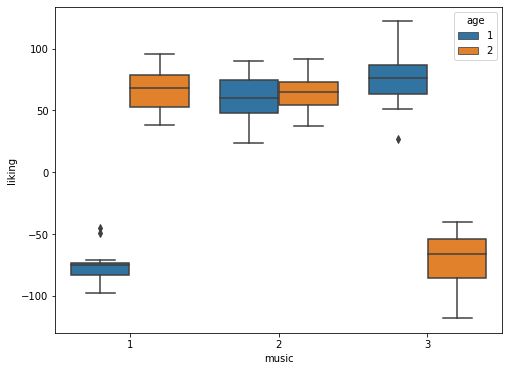

In [9]:
plt.figure(figsize=(8,6))
_ = sns.boxplot(x='music', y='liking', hue='age', data=data)

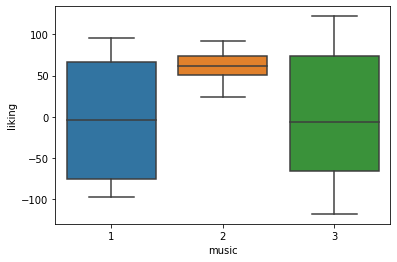

In [10]:
_ = sns.boxplot(x='music', y='liking', data=data)

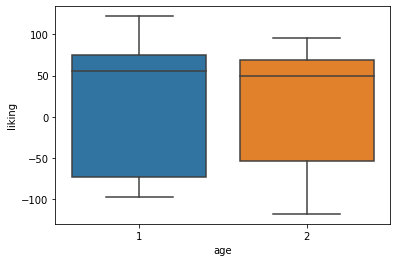

In [11]:
_ = sns.boxplot(x='age', y='liking', data=data)

In [13]:
unique_list = [1,2,3,4,5,6]
unique_list

[1, 2, 3, 4, 5, 6]

In [14]:
data['interaction'] = 0

In [15]:
for i in range(6):
    for j in range(15):
        data.at[15*i+j,'interaction'] = unique_list[i]

In [16]:
# Levene test across interaction variables
pg.homoscedasticity(data, dv='liking',group='interaction')

,W,pval,equal_var
levene,1.070659,0.382536,True


#### # A non-significant result like the one we have here, W(5, 84) = 1.07, p = .382, is indicative of the assumption being met

In [17]:
m01 = smf.ols('liking~C(age)*C(music)', data=data).fit()
m01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 liking   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     202.6
Date:                Sat, 31 Oct 2020   Prob (F-statistic):           2.56e-45
Time:                        22:58:00   Log-Likelihood:                -392.79
No. Observations:                  90   AIC:                             797.6
Df Residuals:                      84   BIC:                             812.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   -75.8667      5.083    -14.926      0.000     -85.975     -65.759
C(age)[T.2]                 142.0667      7.188     19.763      0.000     127.772     156.361
C(music)[T.2]               135.8000      7.188     18.892      0.000     121.505     150.095
C(music)[T.3]               150.1333      7.188     20.886      0.000     135.839     164.428
C(age)[T.2]:C(music)[T.2]  -137.8667     10.166    -13.562      0.000    -158.083    -117.651
C(age)[T.2]:C(music)[T.3]  -287.8000     10.166    -28.310      0.000    -308.016    -267.584
==============================================================================
Omnibus:                        0.296   Durbin-Watson:                   2.200
Prob(Omnibus):                  0.862   Jarque-Bera (JB):                0.459
Skew:                          -0.101   Prob(JB):                        0.795
Kurtosis:                       2.715   Cond. No.                         9.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
sm.stats.anova_lm(m01)

,df,sum_sq,mean_sq,F,PR(>F)
C(age),1.0,0.711111,0.711111,0.001835,9.659339e-01
C(music),2.0,81864.066667,40932.033333,105.619805,1.181397e-23
C(age):C(music),2.0,310790.155556,155395.077778,400.976850,1.067743e-43
Residual,84.0,32553.466667,387.541270,NaN,NaN


In [19]:
# you can get idea for the main effect of age from this
data.groupby('age')['liking'].describe()

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
1,45.0,19.444444,70.931643,-98.0,-73.0,55.0,75.0,122.0
2,45.0,19.622222,68.062568,-118.0,-54.0,49.0,69.0,96.0


In [20]:
# you can get idea for the main effect of music from this
data.groupby('music')['liking'].describe()

,count,mean,std,min,25%,50%,75%,max
music,,,,,,,,
1,30.0,-4.833333,74.234058,-98.0,-75.00,-3.5,66.50,96.0
2,30.0,62.033333,18.351892,24.0,50.25,62.0,73.75,92.0
3,30.0,1.400000,77.407832,-118.0,-65.75,-6.5,74.25,122.0


## Planned Contrasts

In [25]:
con1 = [1,-2,1]
con2 = [1,0,-1]
contrast = np.vstack((con1, con2))
contrast_music = contrast.T
contrast_music

array([[ 1,  1],
       [-2,  0],
       [ 1, -1]])

In [26]:
contrast_age = np.array([[1,-1]])
contrast_age =contrast_age.reshape(2,1)
contrast_age

array([[ 1],
       [-1]])

In [28]:
m02 = smf.ols('liking~C(age, contrast_age)*C(music, contrast_music)', data=data).fit()
m02.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 liking   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     202.6
Date:                Sat, 31 Oct 2020   Prob (F-statistic):           2.56e-45
Time:                        23:00:42   Log-Likelihood:                -392.79
No. Observations:                  90   AIC:                             797.6
Df Residuals:                      84   BIC:                             812.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
Intercept                                                          19.5333      2.075      9.413      0.000      15.407      23.660
C(age, contrast_age)[custom0]                                      -0.0889      2.075     -0.043      0.966      -4.215       4.038
C(music, contrast_music)[custom0]                                 -21.2500      1.467    -14.482      0.000     -24.168     -18.332
C(music, contrast_music)[custom1]                                  -3.1167      2.541     -1.226      0.224      -8.171       1.937
C(age, contrast_age)[custom0]:C(music, contrast_music)[custom0]     1.0056      1.467      0.685      0.495      -1.912       3.923
C(age, contrast_age)[custom0]:C(music, contrast_music)[custom1]   -71.9500      2.541    -28.310      0.000     -77.004     -66.896
==============================================================================
Omnibus:                        0.296   Durbin-Watson:                   2.200
Prob(Omnibus):                  0.862   Jarque-Bera (JB):                0.459
Skew:                          -0.101   Prob(JB):                        0.795
Kurtosis:                       2.715   Cond. No.                         1.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
sm.stats.anova_lm(m02,typ=3)

,sum_sq,df,F,PR(>F)
Intercept,34339.600000,1.0,88.608885,8.744067e-15
"C(age, contrast_age)",0.711111,1.0,0.001835,9.659339e-01
"C(music, contrast_music)",81864.066667,2.0,105.619805,1.181397e-23
"C(age, contrast_age):C(music, contrast_music)",310790.155556,2.0,400.976850,1.067743e-43
Residual,32553.466667,84.0,NaN,NaN


### Plots to show different effects

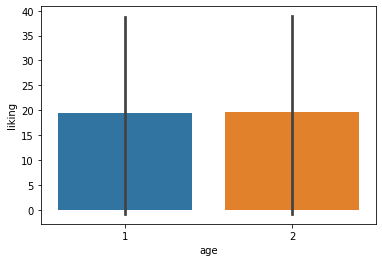

In [30]:
# main effect of age, as we can see from the plot below is not considerble and matches the values from descriptive statistics
_ = sns.barplot(x='age', y='liking', data=data)

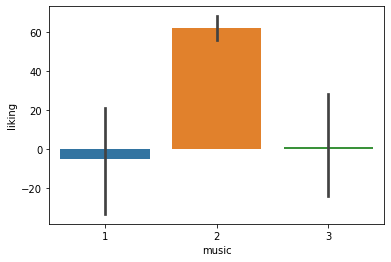

In [31]:
# main effect of music, as we can see from the plot below is  considerble and matches the values from descriptive statistics
_ = sns.barplot(x='music', y='liking', data=data)

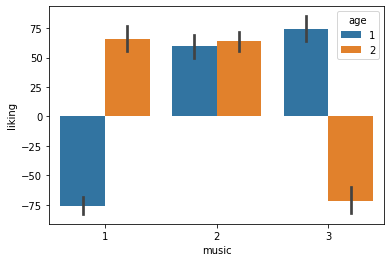

In [32]:
# intraction effect should be significant too
_ = sns.barplot(x='music', y='liking', hue='age', data=data)

### Post-hoc test

In [33]:
from statsmodels.sandbox.stats.multicomp import MultiComparison

In [34]:
multicomp = MultiComparison(data['liking'], data['music'])   # testfunc

In [35]:
# Bonferroni
com = multicomp.allpairtest(st.ttest_ind, method='bonf')
print(com[0])

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.02, alphacBonf=0.017
group1 group2   stat   pval  pval_corr reject
---------------------------------------------
     1      2 -4.7895    0.0       0.0   True
     1      3 -0.3183 0.7514       1.0  False
     2      3  4.1746 0.0001    0.0003   True
---------------------------------------------


In [36]:
def Omega_factorial(n,a,b, MSa, MSb, MSab, MSr):
    varA = ((a-1)*(MSa-MSr))/(n*a*b)
    varB = ((b-1)*(MSb-MSr))/(n*a*b)
    varAB = ((a-1)*(b-1)*(MSab-MSr))/(n*a*b)
    varTotal = varA+varB+varAB+MSr
    print("Omega-Squared A: ", varA/varTotal)
    print("Omega-Squared B: ", varB/varTotal)
    print("Omega-Squared AB: ", varAB/varTotal)

In [37]:
sm.stats.anova_lm(m01)

,df,sum_sq,mean_sq,F,PR(>F)
C(age),1.0,0.711111,0.711111,0.001835,9.659339e-01
C(music),2.0,81864.066667,40932.033333,105.619805,1.181397e-23
C(age):C(music),2.0,310790.155556,155395.077778,400.976850,1.067743e-43
Residual,84.0,32553.466667,387.541270,NaN,NaN


In [38]:
Omega_factorial(15, 2, 3, 0.711111, 40932.033333, 155395.077778, 387.541270)

Omega-Squared A:  -0.0009089141166005088
Omega-Squared B:  0.19053044510140166
Omega-Squared AB:  0.7284258211707323


#### # For the main effect of age, we get, ω2= −.00; for the main effect of music we get, ω2 = .19; and for the interaction, ω2= .73

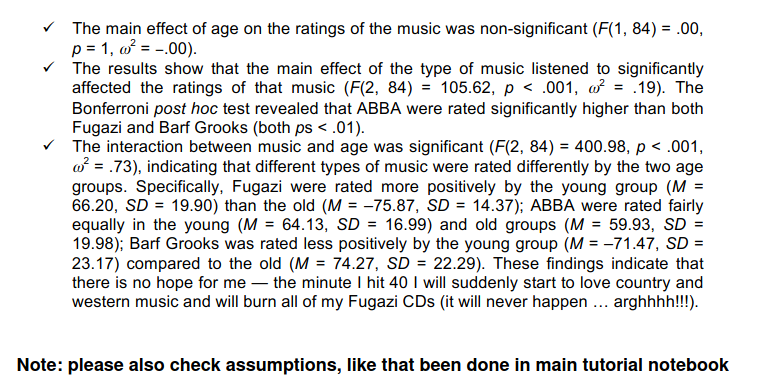

In [39]:
from IPython.display import Image
Image('/home/atrides/Downloads/fugazi.png')